In [125]:
%matplotlib notebook

In [126]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [127]:
#Read the master dataframe with all the averages for each year for each rental type by county
url='master_combined_rentals_df.csv'

master_rentals=pd.read_csv(url)
del master_rentals["Unnamed: 0"]
master_rentals

,County,State,Metro,2013 Average (Studio),2014 Average (Studio),2015 Average (Studio),2016 Average (Studio),2017 Average (Studio),2018 Average (Studio),2013 Average (SFR),2014 Average (SFR),2015 Average (SFR),2016 Average (SFR),2017 Average (SFR),2018 Average (SFR),2013 Average (MFR),2014 Average (MFR),2015 Average (MFR),2016 Average (MFR),2017 Average (MFR),2018 Average (MFR),2013 Average (Duplex Triplex),2014 Average (Duplex Triplex),2015 Average (Duplex Triplex),2016 Average (Duplex Triplex),2017 Average (Duplex Triplex),2018 Average (Duplex Triplex),2013 Average (Condo),2014 Average (Condo),2015 Average (Condo),2016 Average (Condo),2017 Average (Condo),2018 Average (Condo),2013 Average (All Homes),2014 Average (All Homes),2015 Average (All Homes),2016 Average (All Homes),2017 Average (All Homes),2018 Average (All Homes),2013 Average (One Bed),2014 Average (One Bed),2015 Average (One Bed),2016 Average (One Bed),2017 Average (One Bed),2018 Average (One Bed),2013 Average (Two Bed),2014 Average (Two Bed),2015 Average (Two Bed),2016 Average (Two Bed),2017 Average (Two Bed),2018 Average (Two Bed),2013 Average (Three Bed),2014 Average (Three Bed),2015 Average (Three Bed),2016 Average (Three Bed),2017 Average (Three Bed),2018 Average (Three Bed),2013 Average (Four Bed),2014 Average (Four Bed),2015 Average (Four Bed),2016 Average (Four Bed),2017 Average (Four Bed),2018 Average (Four Bed),2013 Average (Five Bed),2014 Average (Five Bed),2015 Average (Five Bed),2016 Average (Five Bed),2017 Average (Five Bed),2018 Average (FIve Bed)
0,Bergen County,NJ,New York-Newark-Jersey City,"$2,418.02","$2,418.02","$2,418.02","$2,418.02","$2,418.02","$2,418.02","$2,418.02","$2,418.02","$2,418.02","$2,418.02","$2,418.02","$2,418.02","$1,441.27","$1,441.27","$1,441.27","$1,441.27","$1,441.27","$1,441.27","$1,277.33","$1,277.33","$1,277.33","$1,277.33","$1,277.33","$1,277.33","$2,108.12","$2,108.12","$2,108.12","$2,108.12","$2,108.12","$2,108.12","$1,995.88","$2,247.50","$2,336.46","$2,322.92","$2,401.04","$2,465.62",$nan,$nan,"$1,538.33","$1,591.58","$1,727.25","$1,964.67",$nan,$nan,"$2,193.04","$2,191.33","$2,371.46","$2,520.83",$nan,$nan,"$2,467.50","$2,542.92","$2,541.67","$2,604.96",$nan,$nan,$nan,$nan,"$3,283.33","$3,400.62",$nan,$nan,$nan,$nan,$nan,$nan
1,Middlesex County,NJ,New York-Newark-Jersey City,"$2,046.99","$2,046.99","$2,046.99","$2,046.99","$2,046.99","$2,046.99","$2,046.99","$2,046.99","$2,046.99","$2,046.99","$2,046.99","$2,046.99","$1,654.64","$1,654.64","$1,654.64","$1,654.64","$1,654.64","$1,654.64","$1,629.50","$1,629.50","$1,629.50","$1,629.50","$1,629.50","$1,629.50","$1,713.01","$1,713.01","$1,713.01","$1,713.01","$1,713.01","$1,713.01","$1,793.75","$1,818.75","$1,836.67","$1,872.92","$1,953.54","$1,964.38",$nan,$nan,$nan,$nan,"$1,116.83","$1,520.79","$1,585.21","$1,631.79","$1,687.92","$1,729.58","$1,827.92","$1,888.38","$2,020.00","$2,058.33","$2,088.75","$2,124.79","$2,247.92","$2,263.17",$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan
2,Essex County,NJ,New York-Newark-Jersey City,"$1,540.23","$1,540.23","$1,540.23","$1,540.23","$1,540.23","$1,540.23","$1,540.23","$1,540.23","$1,540.23","$1,540.23","$1,540.23","$1,540.23","$1,337.38","$1,337.38","$1,337.38","$1,337.38","$1,337.38","$1,337.38","$1,288.41","$1,288.41","$1,288.41","$1,288.41","$1,288.41","$1,288.41",$662.81,$662.81,$662.81,$662.81,$662.81,$662.81,$232.08,"$1,517.58","$1,518.75","$1,595.33","$1,737.29","$1,758.33",$936.67,$939.92,"$1,052.92","$1,107.71","$1,264.54","$1,381.33","$1,276.04","$1,253.75","$1,307.50","$1,432.08","$1,592.50","$1,675.62","$1,310.42","$1,287.50","$1,329.17","$1,388.96","$1,466.25","$1,575.00",$nan,$nan,$nan,$nan,"$1,668.83","$1,756.21",$nan,$nan,$nan,$nan,$nan,$nan
3,Hudson County,NJ,New York-Newark-Jersey City,"$1,821.55","$1,821.55","$1,821.55","$1,821.55","$1,821.55","$1,821.55","$1,821.55","$1,821.55","$1,821.55","$1,821.55","$1,821.55","$1,821.55","$2,153.55","$2,153.55","$2,153.55","$2,153.55","$2,153.55","$2,153.55

In [129]:
#Formatting display so that all values are in a currency format, with all the columns showing
pd.options.display.float_format = '${:,.2f}'.format
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

master_rentals

,County,State,Metro,2013 Average (Studio),2014 Average (Studio),2015 Average (Studio),2016 Average (Studio),2017 Average (Studio),2018 Average (Studio),2013 Average (SFR),2014 Average (SFR),2015 Average (SFR),2016 Average (SFR),2017 Average (SFR),2018 Average (SFR),2013 Average (MFR),2014 Average (MFR),2015 Average (MFR),2016 Average (MFR),2017 Average (MFR),2018 Average (MFR),2013 Average (Duplex Triplex),2014 Average (Duplex Triplex),2015 Average (Duplex Triplex),2016 Average (Duplex Triplex),2017 Average (Duplex Triplex),2018 Average (Duplex Triplex),2013 Average (Condo),2014 Average (Condo),2015 Average (Condo),2016 Average (Condo),2017 Average (Condo),2018 Average (Condo),2013 Average (All Homes),2014 Average (All Homes),2015 Average (All Homes),2016 Average (All Homes),2017 Average (All Homes),2018 Average (All Homes),2013 Average (One Bed),2014 Average (One Bed),2015 Average (One Bed),2016 Average (One Bed),2017 Average (One Bed),2018 Average (One Bed),2013 Average (Two Bed),2014 Average (Two Bed),2015 Average (Two Bed),2016 Average (Two Bed),2017 Average (Two Bed),2018 Average (Two Bed),2013 Average (Three Bed),2014 Average (Three Bed),2015 Average (Three Bed),2016 Average (Three Bed),2017 Average (Three Bed),2018 Average (Three Bed),2013 Average (Four Bed),2014 Average (Four Bed),2015 Average (Four Bed),2016 Average (Four Bed),2017 Average (Four Bed),2018 Average (Four Bed),2013 Average (Five Bed),2014 Average (Five Bed),2015 Average (Five Bed),2016 Average (Five Bed),2017 Average (Five Bed),2018 Average (FIve Bed)
0,Bergen County,NJ,New York-Newark-Jersey City,"$2,418.02","$2,418.02","$2,418.02","$2,418.02","$2,418.02","$2,418.02","$2,418.02","$2,418.02","$2,418.02","$2,418.02","$2,418.02","$2,418.02","$1,441.27","$1,441.27","$1,441.27","$1,441.27","$1,441.27","$1,441.27","$1,277.33","$1,277.33","$1,277.33","$1,277.33","$1,277.33","$1,277.33","$2,108.12","$2,108.12","$2,108.12","$2,108.12","$2,108.12","$2,108.12","$1,995.88","$2,247.50","$2,336.46","$2,322.92","$2,401.04","$2,465.62",$nan,$nan,"$1,538.33","$1,591.58","$1,727.25","$1,964.67",$nan,$nan,"$2,193.04","$2,191.33","$2,371.46","$2,520.83",$nan,$nan,"$2,467.50","$2,542.92","$2,541.67","$2,604.96",$nan,$nan,$nan,$nan,"$3,283.33","$3,400.62",$nan,$nan,$nan,$nan,$nan,$nan
1,Middlesex County,NJ,New York-Newark-Jersey City,"$2,046.99","$2,046.99","$2,046.99","$2,046.99","$2,046.99","$2,046.99","$2,046.99","$2,046.99","$2,046.99","$2,046.99","$2,046.99","$2,046.99","$1,654.64","$1,654.64","$1,654.64","$1,654.64","$1,654.64","$1,654.64","$1,629.50","$1,629.50","$1,629.50","$1,629.50","$1,629.50","$1,629.50","$1,713.01","$1,713.01","$1,713.01","$1,713.01","$1,713.01","$1,713.01","$1,793.75","$1,818.75","$1,836.67","$1,872.92","$1,953.54","$1,964.38",$nan,$nan,$nan,$nan,"$1,116.83","$1,520.79","$1,585.21","$1,631.79","$1,687.92","$1,729.58","$1,827.92","$1,888.38","$2,020.00","$2,058.33","$2,088.75","$2,124.79","$2,247.92","$2,263.17",$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan
2,Essex County,NJ,New York-Newark-Jersey City,"$1,540.23","$1,540.23","$1,540.23","$1,540.23","$1,540.23","$1,540.23","$1,540.23","$1,540.23","$1,540.23","$1,540.23","$1,540.23","$1,540.23","$1,337.38","$1,337.38","$1,337.38","$1,337.38","$1,337.38","$1,337.38","$1,288.41","$1,288.41","$1,288.41","$1,288.41","$1,288.41","$1,288.41",$662.81,$662.81,$662.81,$662.81,$662.81,$662.81,$232.08,"$1,517.58","$1,518.75","$1,595.33","$1,737.29","$1,758.33",$936.67,$939.92,"$1,052.92","$1,107.71","$1,264.54","$1,381.33","$1,276.04","$1,253.75","$1,307.50","$1,432.08","$1,592.50","$1,675.62","$1,310.42","$1,287.50","$1,329.17","$1,388.96","$1,466.25","$1,575.00",$nan,$nan,$nan,$nan,"$1,668.83","$1,756.21",$nan,$nan,$nan,$nan,$nan,$nan
3,Hudson County,NJ,New York-Newark-Jersey City,"$1,821.55","$1,821.55","$1,821.55","$1,821.55","$1,821.55","$1,821.55","$1,821.55","$1,821.55","$1,821.55","$1,821.55","$1,821.55","$1,821.55","$2,153.55","$2,153.55","$2,153.55","$2,153.55","$2,153.55","$2,153.55

In [130]:
#Save dataframe as csv file
master_rentals.to_csv('master_rentals_dataframe.csv')

In [131]:
#Read one bed csv file to plot
url='1_bed_master.csv'
one_bed=pd.read_csv(url)
one_bed


,Unnamed: 0,RegionName,State,Metro,2013 Average,2014 Average,2015 Average,2016 Average,2017 Average,2018 Average
0,0,Bergen County,NJ,New York-Newark-Jersey City,$nan,$nan,"$1,538.33","$1,591.58","$1,727.25","$1,964.67"
1,1,Middlesex County,NJ,New York-Newark-Jersey City,$nan,$nan,$nan,$nan,"$1,116.83","$1,520.79"
2,2,Essex County,NJ,New York-Newark-Jersey City,$936.67,$939.92,"$1,052.92","$1,107.71","$1,264.54","$1,381.33"
3,3,Hudson County,NJ,New York-Newark-Jersey City,"$1,816.58","$1,847.62","$1,892.50","$1,925.21","$2,029.25","$2,189.17"
4,4,Monmouth County,NJ,New York-Newark-Jersey City,"$1,246.67","$1,344.79","$1,320.58","$1,393.33","$1,406.46","$1,465.62"
5,5,Ocean County,NJ,New York-Newark-Jersey City,$nan,$nan,$nan,$176.67,"$1,219.79","$1,235.83"
6,6,Union County,NJ,New York-Newark-Jersey City,$nan,$nan,"$1,283.92","$1,411.46","$1,540.29","$1,591.25"
7,7,Camden County,NJ,Philadelphia-Camden-Wilmington,$843.50,$809.17,$914.29,$962.62,"$1,014.00","$1,026.46"
8,8,Passaic County,NJ,New York-Newark-Jersey City,"$1,118.33","$1,153.75","$1,185.42","$1,220.21","$1,278.54","$1,351.33"
9,9,Morris County,NJ,New York-Newark-Jersey City,"$1,273.54","$1,354.17","$1,548.75","$1,517.75","$1,702.00","$1,904.42"


In [132]:
#Delete unnecessary columns

del (one_bed["Unnamed: 0"],one_bed["State"], one_bed["Metro"],one_bed["RegionName"])
one_bed

,2013 Average,2014 Average,2015 Average,2016 Average,2017 Average,2018 Average
0,$nan,$nan,"$1,538.33","$1,591.58","$1,727.25","$1,964.67"
1,$nan,$nan,$nan,$nan,"$1,116.83","$1,520.79"
2,$936.67,$939.92,"$1,052.92","$1,107.71","$1,264.54","$1,381.33"
3,"$1,816.58","$1,847.62","$1,892.50","$1,925.21","$2,029.25","$2,189.17"
4,"$1,246.67","$1,344.79","$1,320.58","$1,393.33","$1,406.46","$1,465.62"
5,$nan,$nan,$nan,$176.67,"$1,219.79","$1,235.83"
6,$nan,$nan,"$1,283.92","$1,411.46","$1,540.29","$1,591.25"
7,$843.50,$809.17,$914.29,$962.62,"$1,014.00","$1,026.46"
8,"$1,118.33","$1,153.75","$1,185.42","$1,220.21","$1,278.54","$1,351.33"
9,"$1,273.54","$1,354.17","$1,548.75","$1,517.75","$1,702.00","$1,904.42"


In [133]:
#Use iloc to create lists from rows
one_bed_bergen=one_bed.iloc[0] 
one_bed_bergen.tolist()

[nan, nan, 1538.333333333333, 1591.583333333333, 1727.25, 1964.666666666667]

In [134]:
one_bed_middlesex=one_bed.iloc[1] 
one_bed_middlesex.tolist()

[nan, nan, nan, nan, 1116.8333333333333, 1520.791666666667]

In [135]:
one_bed_essex=one_bed.iloc[2] 
one_bed_essex.tolist()

[936.6666666666665,
 939.9166666666665,
 1052.9166666666667,
 1107.7083333333333,
 1264.5416666666667,
 1381.333333333333]

In [136]:
one_bed_hudson=one_bed.iloc[3] 
one_bed_hudson.tolist()

[1816.583333333333,
 1847.625,
 1892.5,
 1925.208333333333,
 2029.25,
 2189.1666666666665]

In [137]:
one_bed_monmouth=one_bed.iloc[4] 
one_bed_monmouth.tolist()

[1246.6666666666667,
 1344.7916666666667,
 1320.5833333333333,
 1393.333333333333,
 1406.458333333333,
 1465.625]

In [138]:
one_bed_ocean=one_bed.iloc[5] 
one_bed_ocean.tolist()

[nan, nan, nan, 176.66666666666663, 1219.7916666666667, 1235.8333333333333]

In [139]:
one_bed_union=one_bed.iloc[6] 
one_bed_union.tolist()

[nan, nan, 1283.9166666666667, 1411.458333333333, 1540.291666666667, 1591.25]

In [140]:
one_bed_camden=one_bed.iloc[7] 
one_bed_camden.tolist()

[843.5,
 809.1666666666665,
 914.2916666666665,
 962.625,
 1014.0,
 1026.4583333333333]

In [141]:
one_bed_passaic=one_bed.iloc[8] 
one_bed_passaic.tolist()

[1118.3333333333333,
 1153.75,
 1185.4166666666667,
 1220.2083333333333,
 1278.5416666666667,
 1351.3333333333333]

In [142]:
one_bed_morris=one_bed.iloc[9] 
one_bed_morris.tolist()

[1273.5416666666667,
 1354.1666666666667,
 1548.75,
 1517.75,
 1702.0,
 1904.416666666667]

In [143]:
one_bed_burlington=one_bed.iloc[10] 
one_bed_burlington.tolist()

[935.0416666666665,
 974.9166666666665,
 1020.375,
 1065.2083333333333,
 1119.7916666666667,
 1143.6666666666667]

In [144]:
one_bed_mercer=one_bed.iloc[11] 
one_bed_mercer.tolist()

[nan, nan, nan, nan, nan, 852.2916666666665]

In [145]:
one_bed_somerset=one_bed.iloc[12] 
one_bed_somerset.tolist()

[nan,
 nan,
 1165.8333333333333,
 1375.708333333333,
 1463.416666666667,
 1497.791666666667]

In [146]:
one_bed_gloucester=one_bed.iloc[13] 
one_bed_gloucester.tolist()

[nan, nan, nan, nan, 968.5416666666665, 1088.8333333333333]

In [147]:
one_bed_atlantic=one_bed.iloc[14] 
one_bed_atlantic.tolist()

[1007.0833333333335,
 996.25,
 1062.875,
 1014.0833333333335,
 943.125,
 1000.8333333333335]

In [148]:
one_bed_sussex=one_bed.iloc[15] 
one_bed_sussex.tolist()

[nan, nan, nan, nan, 537.7083333333334, 1153.875]

In [149]:
one_bed_hunterdon=one_bed.iloc[16] 
one_bed_hunterdon.tolist()

[nan, nan, nan, nan, 681.0416666666666, 1328.3333333333333]

<IPython.core.display.Javascript object>


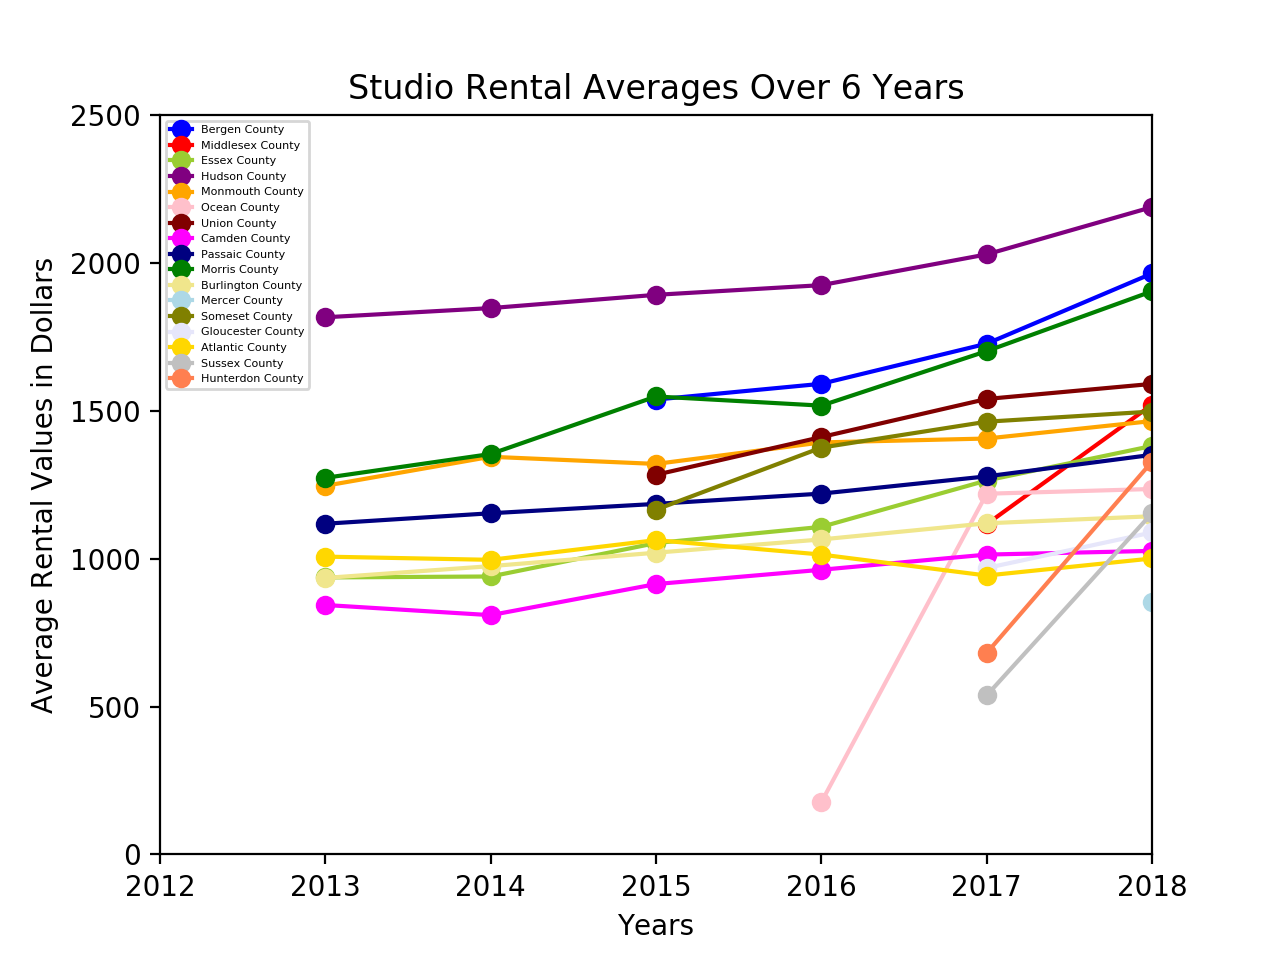

Text(0, 0.5, 'Average Rental Values in Dollars')

In [182]:
#Plotting a line graph for one bed rentals per county over a 6 year span

#Use years for the x-axis
years=[2013,2014,2015,2016,2017,2018]

#Plot lines for each county using the lists created with iloc
plt.plot(years, one_bed_bergen, marker ='o', color='blue', label="Bergen County")
plt.plot(years, one_bed_middlesex, marker ='o', color='red', label="Middlesex County")
plt.plot(years, one_bed_essex, marker ='o', color='yellowgreen', label="Essex County")
plt.plot(years, one_bed_hudson, marker ='o', color='purple', label="Hudson County")
plt.plot(years, one_bed_monmouth, marker ='o', color='orange', label="Monmouth County")
plt.plot(years, one_bed_ocean, marker ='o', color='pink', label="Ocean County")
plt.plot(years, one_bed_union, marker ='o', color='maroon', label="Union County")
plt.plot(years, one_bed_camden, marker ='o', color='magenta', label="Camden County")
plt.plot(years, one_bed_passaic, marker ='o', color='navy', label="Passaic County")
plt.plot(years, one_bed_morris, marker ='o', color='green', label="Morris County")
plt.plot(years, one_bed_burlington, marker ='o', color='khaki', label="Burlington County")
plt.plot(years, one_bed_mercer, marker ='o', color='lightblue', label="Mercer County")
plt.plot(years, one_bed_somerset, marker ='o', color='olive', label="Someset County")
plt.plot(years, one_bed_gloucester, marker ='o', color='lavender', label="Gloucester County")
plt.plot(years, one_bed_atlantic, marker ='o', color='gold', label="Atlantic County")
plt.plot(years, one_bed_sussex, marker ='o', color='silver', label="Sussex County")
plt.plot(years, one_bed_hunterdon, marker ='o', color='coral', label="Hunterdon County")

#Plotting the legend box so that
plt.legend(loc="upper left",prop={'size':4})

#Plotting x-limits, y-limits, title, x-axis and y-axis labels
#Included 2012 in the x-axis limit to make room for the legend box
plt.ylim(0, 2500)
plt.xlim(2012,2018)
plt.title("Studio Rental Averages Over 6 Years")
plt.xlabel("Years")
plt.ylabel("Average Rental Values in Dollars")


In [151]:
#Read csv file for all homes rentals
url='all_homes_master.csv'
all_homes=pd.read_csv(url)
all_homes

,Unnamed: 0,RegionName,State,Metro,2013 Average,2014 Average,2015 Average,2016 Average,2017 Average,2018 Average
0,0,Bergen County,NJ,New York-Newark-Jersey City,"$1,995.88","$2,247.50","$2,336.46","$2,322.92","$2,401.04","$2,465.62"
1,1,Middlesex County,NJ,New York-Newark-Jersey City,"$1,793.75","$1,818.75","$1,836.67","$1,872.92","$1,953.54","$1,964.38"
2,2,Essex County,NJ,New York-Newark-Jersey City,$232.08,"$1,517.58","$1,518.75","$1,595.33","$1,737.29","$1,758.33"
3,3,Hudson County,NJ,New York-Newark-Jersey City,"$1,985.42","$2,104.17","$2,307.58","$2,252.08","$2,260.42","$2,244.79"
4,4,Monmouth County,NJ,New York-Newark-Jersey City,"$2,086.25","$2,112.50","$2,162.08","$2,158.33","$2,279.17","$2,368.75"
5,5,Ocean County,NJ,New York-Newark-Jersey City,"$1,571.62","$1,530.21","$1,595.62","$1,620.83","$1,665.42","$1,724.58"
6,6,Union County,NJ,New York-Newark-Jersey City,"$1,718.96","$1,900.00","$1,963.96","$2,055.83","$2,089.42","$2,123.96"
7,7,Camden County,NJ,Philadelphia-Camden-Wilmington,"$1,298.33","$1,377.50","$1,417.71","$1,414.58","$1,437.50","$1,453.83"
8,8,Passaic County,NJ,New York-Newark-Jersey City,"$1,519.79","$1,652.08","$1,686.25","$1,689.17","$1,742.71","$1,858.75"
9,9,Morris County,NJ,New York-Newark-Jersey City,"$2,134.33","$2,283.33","$2,329.17","$2,320.83","$2,412.71","$2,451.88"


In [152]:
#Create a list from the 2018 Average columns
all_homes_2018=all_homes["2018 Average"].tolist()
all_homes_2018

[2465.625,
 1964.375,
 1758.333333333333,
 2244.7916666666665,
 2368.75,
 1724.583333333333,
 2123.958333333333,
 1453.833333333333,
 1858.75,
 2451.875,
 1597.916666666667,
 1727.083333333333,
 2120.833333333333,
 1648.333333333333,
 1570.791666666667,
 1211.25,
 1620.833333333333,
 1948.958333333333,
 1491.666666666667,
 1187.5]

In [153]:
#Create a list from the counties column
counties=all_homes["RegionName"].tolist()
counties

['Bergen County',
 'Middlesex County',
 'Essex County',
 'Hudson County',
 'Monmouth County',
 'Ocean County',
 'Union County',
 'Camden County',
 'Passaic County',
 'Morris County',
 'Burlington County',
 'Mercer County',
 'Somerset County',
 'Gloucester County',
 'Atlantic County',
 'Cumberland County',
 'Sussex County',
 'Hunterdon County',
 'Warren County',
 'Salem County']

<IPython.core.display.Javascript object>


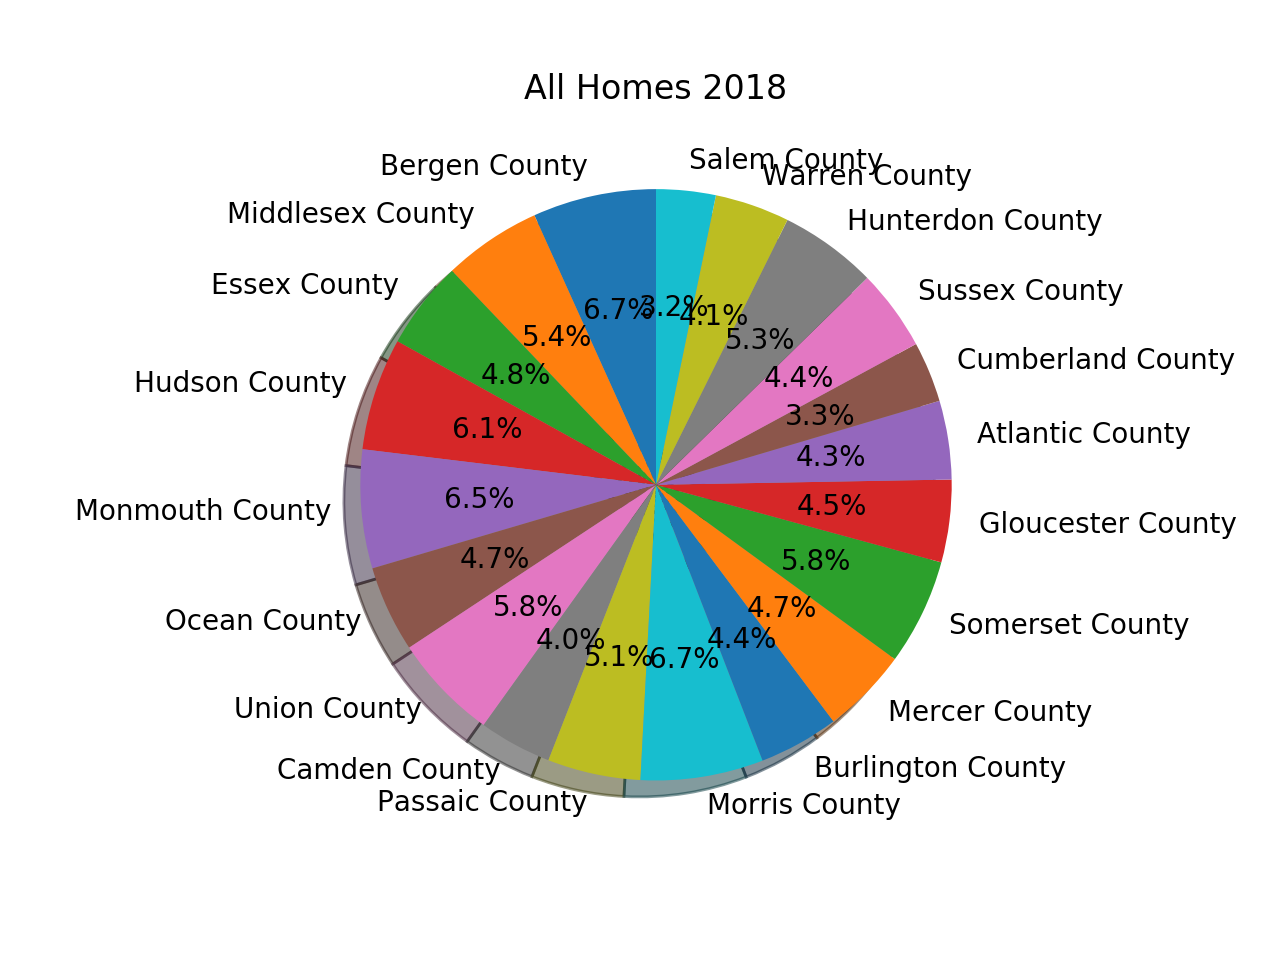

Text(0.5, 1.0, 'All Homes 2018')

In [154]:
#Plot a pie chart showing the percentage of rental value for each county in 2018
plt.pie(all_homes_2018, labels=counties, 
     autopct="%1.1f%%", shadow=True, startangle=90)

plt.title("All Homes 2018")

In [155]:
#Import studio rentals csv file
url='clean_studio.csv'
studio=pd.read_csv(url)
studio

,Unnamed: 0,RegionName,State,Metro,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
0,46,Bergen County,NJ,New York-Newark-Jersey City,"$1,862.50","$1,750.00","$1,900.00","$1,900.00","$2,000.00","$2,000.00","$2,000.00","$2,239.00","$2,150.00","$2,000.00","$2,000.00","$2,100.00","$2,100.00","$2,050.00","$2,100.00","$2,100.00","$2,300.00","$2,400.00","$2,300.00","$2,250.00","$2,200.00","$2,200.00","$2,200.00","$2,200.00","$2,170.00","$2,197.50","$2,300.00","$2,300.00","$2,375.00","$2,350.00","$2,400.00","$2,400.00","$2,300.00","$2,250.00","$2,285.00","$2,300.00","$2,300.00","$2,300.00","$2,300.00","$2,362.50","$2,495.00","$2,375.00","$2,400.00","$2,300.00","$2,300.00","$2,200.00","$2,250.00","$2,100.00","$2,300.00","$2,287.50","$2,300.00","$2,316.50","$2,499.50","$2,500.00","$2,500.00","$2,500.00","$2,400.00","$2,300.00","$2,300.00","$2,322.50","$2,295.00","$2,250.00","$2,250.00","$2,400.00","$2,500.00","$2,550.00","$2,600.00","$2,600.00","$2,500.00","$2,450.00","$2,400.00","$2,380.00"
1,52,Middlesex County,NJ,New York-Newark-Jersey City,"$1,795.00","$1,750.00","$1,800.00","$1,750.00","$1,800.00","$1,800.00","$1,800.00","$1,800.00","$1,800.00","$1,800.00","$1,800.00","$1,800.00","$1,800.00","$1,800.00","$1,800.00","$1,800.00","$1,800.00","$1,800.00","$1,850.00","$1,850.00","$1,825.00","$1,850.00","$1,800.00","$1,850.00","$1,850.00","$1,850.00","$1,800.00","$1,800.00","$1,850.00","$1,850.00","$1,850.00","$1,850.00","$1,850.00","$1,850.00","$1,850.00","$1,850.00","$1,850.00","$1,900.00","$1,850.00","$1,850.00","$1,850.00","$1,950.00","$1,900.00","$1,900.00","$1,950.00","$1,950.00","$1,890.00","$1,900.00","$1,920.00","$1,900.00","$1,900.00","$1,925.00","$1,950.00","$2,000.00","$2,000.00","$2,000.00","$1,950.00","$1,950.00","$1,975.00","$1,950.00","$1,900.00","$1,900.00","$1,900.00","$1,950.00","$2,000.00","$1,950.00","$1,950.00","$2,000.00","$1,950.00","$1,950.00","$2,000.00","$1,975.00"
2,60,Essex County,NJ,New York-Newark-Jersey City,"$1,300.00","$1,350.00","$1,400.00","$1,339.50","$1,300.00","$1,300.00","$1,300.00","$1,300.00","$1,300.00","$1,400.00","$1,300.00","$1,400.00","$1,400.00","$1,400.00","$1,400.00","$1,400.00","$1,650.00","$1,600.00","$1,500.00","$1,500.00","$1,500.00","$1,450.00","$1,450.00","$1,550.00","$1,550.00","$1,550.00","$1,562.50","$1,500.00","$1,595.00","$1,600.00","$1,600.00","$1,550.00","$1,500.00","$1,500.00","$1,550.00","$1,600.00","$1,600.00","$1,600.00","$1,600.00","$1,650.00","$1,600.00","$1,700.00","$1,700.00","$1,700.00","$1,485.00","$1,575.00","$1,600.00","$1,500.00","$1,550.00","$1,600.00","$1,600.00","$1,725.00","$1,800.00","$1,762.50","$1,750.00","$1,735.00","$1,675.00","$1,675.00","$1,700.00","$1,700.00","$1,650.00","$1,650.00","$1,600.00","$1,700.00","$1,700.00","$1,800.00","$1,780.00","$1,777.50","$1,800.00","$1,700.00","$1,700.00","$1,695.00"
3,78,Hudson County,NJ,New York-Newark-Jersey City,"$1,600.00","$1,612.50","$1,662.50","$1,750.00","$1,775.00","$1,650.00","$1,700.00","$1,750.00","$1,700.00","$1,700.00","$1,800.00","$1,800.00","$1,787.50","$1,700.00","$1,700.00","$1,730.00","$1,900.00","$1,900.00","$1,950.00","$1,880.00","$1,915.00","$2,000.00","$1,850.00","$1,750.00","$1,750.00","$1,875.00","$1,900.00","$1,850.00","$1,850.00","$1,907.50","$2,000.00","$2,000.00","$2,000.00","$1,994.00","$1,865.00","$1,880.00","$1,882.50","$1,900.00","$1,895.00","$1,875.00","$1,900.00","$1,900.00","$1,900.00","$1,940.00","$1,955.00","$1,950.00","$1,900.00","$1,850.00","$1,900.00","$1,925

In [156]:
#Create a new dataframe with only the columns for months in 2018
studio_2018=pd.DataFrame(studio[["2018-01","2018-02","2018-03","2018-04","2018-05","2018-06","2018-07","2018-08",
                                      "2018-09","2018-10","2018-11","2018-12"]])
studio_2018

,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
0,"$2,295.00","$2,250.00","$2,250.00","$2,400.00","$2,500.00","$2,550.00","$2,600.00","$2,600.00","$2,500.00","$2,450.00","$2,400.00","$2,380.00"
1,"$1,900.00","$1,900.00","$1,900.00","$1,950.00","$2,000.00","$1,950.00","$1,950.00","$2,000.00","$1,950.00","$1,950.00","$2,000.00","$1,975.00"
2,"$1,650.00","$1,650.00","$1,600.00","$1,700.00","$1,700.00","$1,800.00","$1,780.00","$1,777.50","$1,800.00","$1,700.00","$1,700.00","$1,695.00"
3,"$2,000.00","$1,950.00","$1,992.50","$2,005.00","$2,040.00","$2,000.00","$2,022.50","$2,000.00","$2,050.00","$2,000.00","$2,000.00","$2,000.00"
4,"$1,675.00","$1,700.00","$1,750.00","$1,737.50","$1,800.00","$1,800.00","$1,750.00","$1,790.00","$1,700.00","$1,700.00","$1,700.00","$1,700.00"
5,"$1,850.00","$1,850.00","$1,850.00","$1,900.00","$2,000.00","$2,025.00","$2,100.00","$2,200.00","$2,200.00","$2,000.00","$2,100.00","$2,000.00"
6,"$1,447.50","$1,400.00","$1,400.00","$1,367.50","$1,350.00","$1,500.00","$1,500.00","$1,500.00","$1,500.00","$1,500.00","$1,500.00","$1,500.00"
7,"$1,725.00","$1,712.50","$1,787.50","$1,850.00","$1,985.00","$1,900.00","$1,900.00","$2,000.00","$2,000.00","$1,900.00","$1,925.00","$1,950.00"
8,"$2,475.00","$2,350.00","$2,300.00","$2,350.00","$2,400.00","$2,500.00","$2,500.00","$2,500.00","$2,500.00","$2,400.00","$2,500.00","$2,500.00"
9,"$1,600.00","$1,614.50","$1,600.00","$1,600.00","$1,650.00","$1,650.00","$1,650.00","$1,650.00","$1,650.00","$1,650.00","$1,650.00","$1,650.00"


In [157]:
#Create a list for counties
counties=studio["RegionName"].tolist()
counties

['Bergen County',
 'Middlesex County',
 'Essex County',
 'Hudson County',
 'Ocean County',
 'Union County',
 'Camden County',
 'Passaic County',
 'Morris County',
 'Burlington County',
 'Mercer County',
 'Somerset County',
 'Gloucester County',
 'Atlantic County',
 'Cumberland County',
 'Sussex County',
 'Hunterdon County',
 'Warren County',
 'Cape May County',
 'Salem County']

In [158]:
#Use iloc to create a list from rows representing each county to later plot lines for each county over
#the span of 12 months
studio_bergen=studio_2018.iloc[0] 
studio_bergen.tolist()

[2295.0,
 2250.0,
 2250.0,
 2400.0,
 2500.0,
 2550.0,
 2600.0,
 2600.0,
 2500.0,
 2450.0,
 2400.0,
 2380.0]

In [159]:
studio_middlesex=studio_2018.iloc[1] 
studio_middlesex.tolist()

[1900.0,
 1900.0,
 1900.0,
 1950.0,
 2000.0,
 1950.0,
 1950.0,
 2000.0,
 1950.0,
 1950.0,
 2000.0,
 1975.0]

In [160]:
studio_essex=studio_2018.iloc[2] 
studio_essex.tolist()

[1650.0,
 1650.0,
 1600.0,
 1700.0,
 1700.0,
 1800.0,
 1780.0,
 1777.5,
 1800.0,
 1700.0,
 1700.0,
 1695.0]

In [161]:
studio_hudson=studio_2018.iloc[3] 
studio_hudson.tolist()

[2000.0,
 1950.0,
 1992.5,
 2005.0,
 2040.0,
 2000.0,
 2022.5,
 2000.0,
 2050.0,
 2000.0,
 2000.0,
 2000.0]

In [162]:
studio_ocean=studio_2018.iloc[4] 
studio_ocean.tolist()

[1675.0,
 1700.0,
 1750.0,
 1737.5,
 1800.0,
 1800.0,
 1750.0,
 1790.0,
 1700.0,
 1700.0,
 1700.0,
 1700.0]

In [163]:
studio_union=studio_2018.iloc[5] 
studio_union.tolist()

[1850.0,
 1850.0,
 1850.0,
 1900.0,
 2000.0,
 2025.0,
 2100.0,
 2200.0,
 2200.0,
 2000.0,
 2100.0,
 2000.0]

In [164]:
studio_camden=studio_2018.iloc[6] 
studio_camden.tolist()

[1447.5,
 1400.0,
 1400.0,
 1367.5,
 1350.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0,
 1500.0]

In [165]:
studio_passaic=studio_2018.iloc[7] 
studio_passaic.tolist()

[1725.0,
 1712.5,
 1787.5,
 1850.0,
 1985.0,
 1900.0,
 1900.0,
 2000.0,
 2000.0,
 1900.0,
 1925.0,
 1950.0]

In [166]:
studio_morris=studio_2018.iloc[8] 
studio_morris.tolist()

[2475.0,
 2350.0,
 2300.0,
 2350.0,
 2400.0,
 2500.0,
 2500.0,
 2500.0,
 2500.0,
 2400.0,
 2500.0,
 2500.0]

In [167]:
studio_burlington=studio_2018.iloc[9] 
studio_burlington.tolist()

[1600.0,
 1614.5,
 1600.0,
 1600.0,
 1650.0,
 1650.0,
 1650.0,
 1650.0,
 1650.0,
 1650.0,
 1650.0,
 1650.0]

In [168]:
studio_mercer=studio_2018.iloc[10] 
studio_mercer.tolist()

[1600.0,
 1550.0,
 1550.0,
 1650.0,
 1775.0,
 1800.0,
 1812.5,
 1800.0,
 1750.0,
 1750.0,
 1675.0,
 1650.0]

In [169]:
studio_somerset=studio_2018.iloc[11] 
studio_somerset.tolist()

[2100.0,
 2100.0,
 2000.0,
 2100.0,
 2150.0,
 2200.0,
 2200.0,
 2150.0,
 2150.0,
 2100.0,
 2100.0,
 2100.0]

In [170]:
studio_gloucester=studio_2018.iloc[12] 
studio_gloucester.tolist()

[1700.0,
 1750.0,
 1700.0,
 1750.0,
 1750.0,
 1675.0,
 1700.0,
 1700.0,
 1650.0,
 1685.0,
 1700.0,
 1700.0]

In [171]:
studio_atlantic=studio_2018.iloc[13] 
studio_atlantic.tolist()

[1595.0,
 1600.0,
 1600.0,
 1650.0,
 1700.0,
 1700.0,
 1600.0,
 1500.0,
 1500.0,
 1450.0,
 1500.0,
 1600.0]

In [172]:
studio_cumberland=studio_2018.iloc[14] 
studio_cumberland.tolist()

[1200.0,
 1200.0,
 1225.0,
 1275.0,
 1262.5,
 1300.0,
 1200.0,
 1200.0,
 1200.0,
 1250.0,
 1250.0,
 1300.0]

In [173]:
studio_sussex=studio_2018.iloc[15] 
studio_sussex.tolist()

[1550.0,
 1550.0,
 1550.0,
 1587.5,
 1750.0,
 1750.0,
 1762.5,
 1700.0,
 1700.0,
 1700.0,
 1700.0,
 1650.0]

In [174]:
studio_hunterdon=studio_2018.iloc[16] 
studio_hunterdon.tolist()

[1890.0,
 1850.0,
 1950.0,
 1800.0,
 1925.0,
 2200.0,
 2100.0,
 2100.0,
 1950.0,
 1900.0,
 2100.0,
 2097.5]

In [175]:
studio_warren=studio_2018.iloc[17] 
studio_warren.tolist()

[1350.0,
 1400.0,
 1425.0,
 1550.0,
 1550.0,
 1637.5,
 1637.5,
 1500.0,
 1550.0,
 1575.0,
 1550.0,
 1425.0]

In [176]:
studio_capemay=studio_2018.iloc[18] 
studio_capemay.tolist()

[0.0,
 0.0,
 0.0,
 1950.0,
 2000.0,
 2000.0,
 1987.5,
 1650.0,
 1600.0,
 1350.0,
 1500.0,
 1587.5]

In [177]:
studio_salem=studio_2018.iloc[19] 
studio_salem.tolist()

[1200.0,
 1200.0,
 1212.5,
 1225.0,
 1200.0,
 1200.0,
 1200.0,
 1250.0,
 1225.0,
 1200.0,
 1200.0,
 1200.0]

<IPython.core.display.Javascript object>


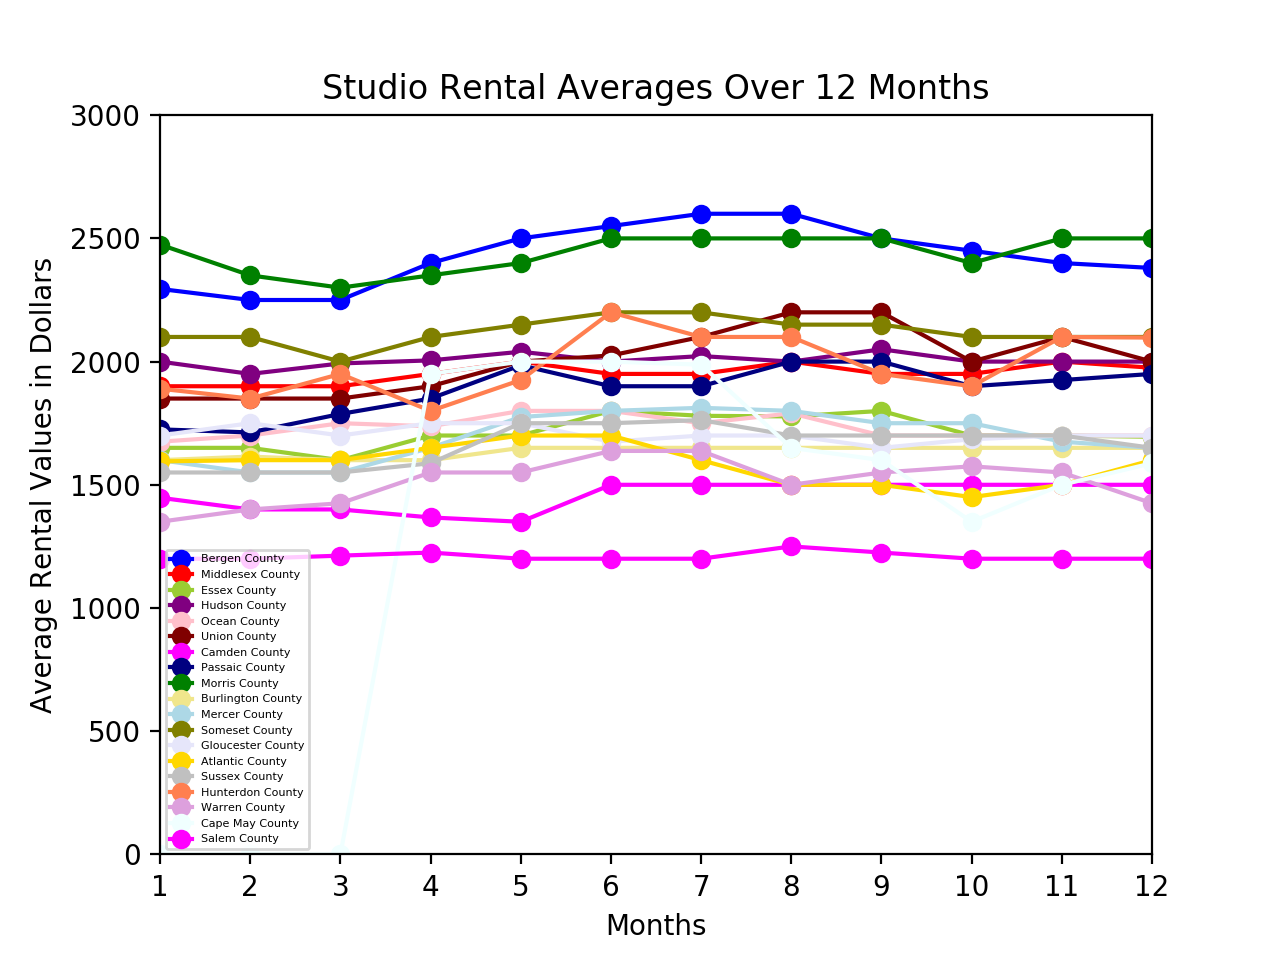

([<matplotlib.axis.XTick at 0x12ad81908>,
 <a list of 12 Text xticklabel objects>)

In [186]:
#Plotting a line graph for studio rental values for each county over a span of 12 months in 2018

#Using months as the x-axis
months=[1,2,3,4,5,6,7,8,9,10,11,12]

#Ploting each line representing each county using the lists created with iloc
plt.plot(months, studio_bergen, marker ='o', color='blue', label="Bergen County")
plt.plot(months, studio_middlesex, marker ='o', color='red', label="Middlesex County")
plt.plot(months, studio_essex, marker ='o', color='yellowgreen', label="Essex County")
plt.plot(months, studio_hudson, marker ='o', color='purple', label="Hudson County")
plt.plot(months, studio_ocean, marker ='o', color='pink', label="Ocean County")
plt.plot(months, studio_union, marker ='o', color='maroon', label="Union County")
plt.plot(months, studio_camden, marker ='o', color='magenta', label="Camden County")
plt.plot(months, studio_passaic, marker ='o', color='navy', label="Passaic County")
plt.plot(months, studio_morris, marker ='o', color='green', label="Morris County")
plt.plot(months, studio_burlington, marker ='o', color='khaki', label="Burlington County")
plt.plot(months, studio_mercer, marker ='o', color='lightblue', label="Mercer County")
plt.plot(months, studio_somerset, marker ='o', color='olive', label="Someset County")
plt.plot(months, studio_gloucester, marker ='o', color='lavender', label="Gloucester County")
plt.plot(months, studio_atlantic, marker ='o', color='gold', label="Atlantic County")
plt.plot(months, studio_sussex, marker ='o', color='silver', label="Sussex County")
plt.plot(months, studio_hunterdon, marker ='o', color='coral', label="Hunterdon County")
plt.plot(months, studio_warren, marker ='o', color='plum', label="Warren County")
plt.plot(months, studio_capemay, marker ='o', color='azure', label="Cape May County")
plt.plot(months, studio_salem, marker ='o', color='fuchsia', label="Salem County")


plt.legend(loc="best",prop={'size':4})

plt.ylim(0, 3000)
plt.xlim(1,12)
plt.title("Studio Rental Averages Over 12 Months")
plt.xlabel("Months")
plt.ylabel("Average Rental Values in Dollars")
plt.xticks(months)